In [1]:
import os
import cv2
import random
from imutils import paths

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
random.seed(42)

In [3]:
data=[]
labels=[]
image_path= sorted(list(paths.list_images('Data_set')))

random.shuffle(image_path)

for path in image_path:
    image= cv2.imread(path)
    image= cv2.resize(image,(64,64))    
    data.append(image)
    
    label= path.split(os.path.sep)[-2]
    labels.append(label)

data=np.array(data,dtype='float')/255
labels=np.array(labels)

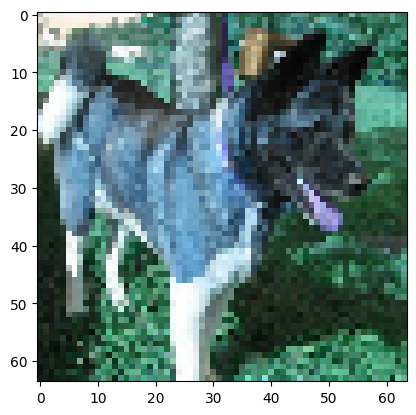

In [5]:
plt.imshow(data[98]);

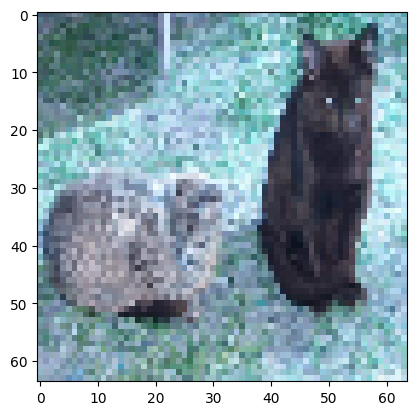

In [6]:
plt.imshow(data[10]);

In [7]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [8]:
def check_shape(df):
    print(df.shape)

In [9]:
print('X_training_shape')
check_shape(X_train)
print('X_test_shape')
check_shape(X_test)
print('Y_training_shape')
check_shape(y_train)
print('Y_test_shape')
check_shape(y_test)

X_training_shape
(153, 64, 64, 3)
X_test_shape
(39, 64, 64, 3)
Y_training_shape
(153,)
Y_test_shape
(39,)


In [10]:
cnn= tf.keras.Sequential([
    tf.keras.layers.Conv2D(30,activation='relu',input_shape=(64,64,3),strides=(2,2),kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(60,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(90,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
opti= 'adam'
loss='binary_crossentropy'
metrics= ['accuracy']
epoch=25
batch_size=32

In [12]:
cnn.compile(optimizer=opti,loss=loss,metrics=metrics)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le= LabelEncoder()

In [15]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [16]:
hist= cnn.fit(X_train,y_train,epochs=epoch,validation_data=(X_test,y_test),batch_size=batch_size)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.5107 - loss: 0.6980 - val_accuracy: 0.5385 - val_loss: 0.6841
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4486 - loss: 0.6987 - val_accuracy: 0.5385 - val_loss: 0.6839
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5103 - loss: 0.6853 - val_accuracy: 0.6154 - val_loss: 0.6814
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7693 - loss: 0.6726 - val_accuracy: 0.6923 - val_loss: 0.6693
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7735 - loss: 0.6514 - val_accuracy: 0.6667 - val_loss: 0.6418
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6945 - loss: 0.6272 - val_accuracy: 0.6667 - val_loss: 0.6082
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7162 - loss: 0.5796 - val_accuracy: 0.7949 - val_loss: 0.5597
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8483 - loss: 0.5135 - val_accuracy: 0.7179 - val_loss: 0.5005

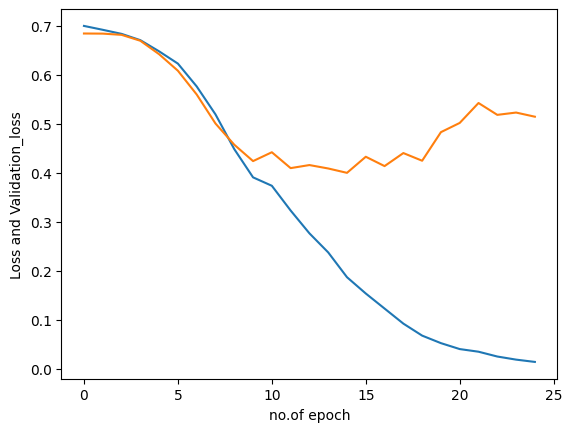

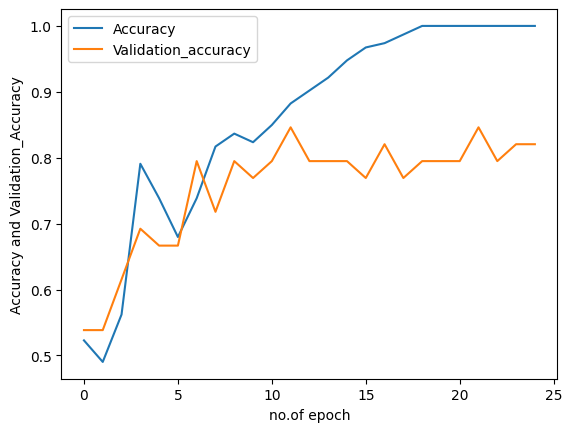

In [17]:
N= np.arange(0,epoch)

plt.figure()
plt.plot(N,hist.history['loss'],label='Loss')
plt.plot(N,hist.history['val_loss'],label='Validation_Loss')
plt.xlabel('no.of epoch')
plt.ylabel('Loss and Validation_loss')

plt.figure()
plt.plot(N,hist.history['accuracy'],label='Accuracy')
plt.plot(N,hist.history['val_accuracy'],label='Validation_accuracy')
plt.xlabel('no.of epoch')
plt.ylabel('Accuracy and Validation_Accuracy')
plt.legend();
plt.legend();

In [18]:
cnn.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8283 - loss: 0.5047


[0.5143846869468689, 0.8205128312110901]

In [19]:
preds= np.round(cnn.predict(X_test),0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
classification= classification_report(preds,y_test)
print(classification)

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        19
         1.0       0.81      0.85      0.83        20

    accuracy                           0.82        39
   macro avg       0.82      0.82      0.82        39
weighted avg       0.82      0.82      0.82        39



In [22]:
confusion= confusion_matrix(preds,y_test)
print(confusion)

[[15  4]
 [ 3 17]]


In [25]:
image= cv2.imread("dog_image.jpeg")
image= cv2.resize(image,(64,64))

In [24]:
X_test.shape

(39, 64, 64, 3)

In [26]:
image.shape

(64, 64, 3)

In [37]:
image= image.reshape(1,64,64,3)

In [38]:
image.shape

(1, 64, 64, 3)

In [39]:
preds= np.round(cnn.predict(image),0)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[1.]], dtype=float32)